In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Objective: 
# This case study aims to identify patterns which indicate if a client 
# has difficulty paying their instalments which may be used for taking 
# actions such as denying the loan, reducing the amount of loan, lending 
# (too risky applicants) at a higher interest rate, etc. This will ensure 
# that the consumers capable of repaying the loan are not rejected.
# Identification of such applicant's using EDA is the aim of this case study.

In [3]:
data = pd.read_csv("./data/application_data.csv")

# Cleaning

In [4]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Insight: 
# There are huge amount of cloumns, 
# the data could ne unbalanced.
# Should check data duplication,removing null rows.

In [6]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [7]:
# Insight: TARGET seems to be the target variable

In [8]:
data['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [9]:
# Insight: Confirmed - Imbalanced data

In [10]:
data.shape

(307511, 122)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [12]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [13]:
data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [14]:
# Insight: 16 categorical variables and rest numerical features.
# we should convert numeric variables to categorical.

In [15]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [16]:
# 2,application_data,TARGET,"Target variable 
# (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 
# 0 - all other cases)",

In [17]:
pd.set_option('display.max_rows', 122)
data.head(1).T

,0
SK_ID_CURR,100002
TARGET,1
NAME_CONTRACT_TYPE,Cash loans
CODE_GENDER,M
FLAG_OWN_CAR,N
FLAG_OWN_REALTY,Y
CNT_CHILDREN,0
AMT_INCOME_TOTAL,202500.0
AMT_CREDIT,406597.5
AMT_ANNUITY,24700.5


In [18]:
# Based on this and description mentioned in "cloumns_description.csv" file,
# Many irrelevant columns are there, should remove them, 
# many correlated columns are there, should remove them,
# Should check the null rows and remove them

In [19]:
data.describe(include="object")

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


In [20]:
n_rows = data.shape[0]
null_df = (data.isnull().sum()/n_rows*100).sort_values(ascending= False)

In [21]:
null_df.head(122)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [22]:
null_df.tail(70)

AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
CNT_CHILDREN                    0.000000
FLAG_DOCUMENT_8                 0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_DOCUMENT_2                 0.000000
FLAG_DOCUMENT_3                 0.000000
FLAG_DOCUMENT_4                 0.000000
FLAG_DOCUMENT_5                 0.000000
FLAG_DOCUMENT_6 

In [23]:
# Insight: So there are more than 50 features out of 122 features, 
# whose more than 31 percent values are null.
# So we should remove these features.

In [24]:
data_v2 = data.dropna(axis=1, thresh=n_rows*0.7)

In [25]:
data_v2.shape

(307511, 72)

In [26]:
# Just checking if the dropped columns have any direct correlation with the target variable.

In [27]:
original_columns = data.columns.tolist()
dropped_columns = [col for col in original_columns if col not in data_v2.columns]

In [28]:
dropped_columns

['OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MO

In [29]:
selected_columns = dropped_columns + ['TARGET']
data_selected = data[selected_columns]

In [30]:
correlation_matrix = data_selected.corr()
correlation_with_target = correlation_matrix['TARGET'].drop('TARGET')  # Drop the target variable itself

In [31]:
correlation_with_target.sort_values(ascending=False)

OWN_CAR_AGE                     0.037612
NONLIVINGAPARTMENTS_MODE       -0.001557
NONLIVINGAPARTMENTS_MEDI       -0.002757
NONLIVINGAPARTMENTS_AVG        -0.003176
YEARS_BEGINEXPLUATATION_MODE   -0.009036
YEARS_BEGINEXPLUATATION_AVG    -0.009728
YEARS_BEGINEXPLUATATION_MEDI   -0.009993
LANDAREA_MODE                  -0.010174
LANDAREA_AVG                   -0.010885
LANDAREA_MEDI                  -0.011256
NONLIVINGAREA_MODE             -0.012711
NONLIVINGAREA_MEDI             -0.013337
NONLIVINGAREA_AVG              -0.013578
COMMONAREA_MODE                -0.016340
ENTRANCES_MODE                 -0.017387
COMMONAREA_AVG                 -0.018550
COMMONAREA_MEDI                -0.018573
ENTRANCES_MEDI                 -0.019025
ENTRANCES_AVG                  -0.019172
BASEMENTAREA_MODE              -0.019952
YEARS_BUILD_MODE               -0.022068
BASEMENTAREA_MEDI              -0.022081
YEARS_BUILD_AVG                -0.022149
YEARS_BUILD_MEDI               -0.022326
BASEMENTAREA_AVG

In [32]:
# I guess OCCUPATION_TYPE seems an important feature which should be investigated. 

In [33]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
data_v2['OCCUPATION_TYPE'] = data['OCCUPATION_TYPE']

In [35]:
data_v2.shape

(307511, 73)

In [36]:
data_v2.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       

In [37]:
def convert_to_years(x):
    return abs(x//365)

In [38]:
data_v2['YEARS_BIRTH']= data_v2['DAYS_BIRTH'].apply(convert_to_years)
data_v2.drop(['DAYS_BIRTH'],inplace=True,axis=1)

In [39]:
data_v2['YEARS_EMPLOYED']= data_v2['DAYS_EMPLOYED'].apply(convert_to_years)
data_v2.drop(['DAYS_EMPLOYED'],inplace=True,axis=1)
data_v2['YEARS_REGISTRATION']= data_v2['DAYS_REGISTRATION'].apply(convert_to_years)
data_v2.drop(['DAYS_REGISTRATION'],inplace=True,axis=1)
data_v2['YEARS_ID_PUBLISH']= data_v2['DAYS_ID_PUBLISH'].apply(convert_to_years)
data_v2.drop(['DAYS_ID_PUBLISH'],inplace=True,axis=1)
data_v2['YEARS_LAST_PHONE_CHANGE']= data_v2['DAYS_LAST_PHONE_CHANGE'].apply(convert_to_years)
data_v2.drop(['DAYS_LAST_PHONE_CHANGE'],inplace=True,axis=1)

In [40]:
data_v2.drop(['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'NAME_TYPE_SUITE','EXT_SOURCE_2', 'EXT_SOURCE_3'], axis= 1, inplace= True)

In [41]:
data_v2.drop(['REGION_POPULATION_RELATIVE','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY','OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'], axis= 1, inplace= True)

In [42]:
data_v2.drop(['REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION','AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'YEARS_ID_PUBLISH', 'YEARS_LAST_PHONE_CHANGE'], axis= 1, inplace= True)

In [43]:
data_v2.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE', 'OCCUPATION_TYPE',
       'YEARS_BIRTH', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION'],
      dtype='object')

In [44]:
data_v2.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,CNT_FAM_MEMBERS,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307509.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,2.152665,44.433090,185.839472,14.165721
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.910682,11.954493,381.588910,9.647134
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,1.000000,21.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,2.000000,35.000000,3.000000,6.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,2.000000,44.000000,7.000000,13.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,3.000000,54.000000,16.000000,21.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,20.000000,70.000000,1000.000000,68.000000


In [45]:
data_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           307511 non-null  int64  
 1   TARGET               307511 non-null  int64  
 2   NAME_CONTRACT_TYPE   307511 non-null  object 
 3   CODE_GENDER          307511 non-null  object 
 4   FLAG_OWN_CAR         307511 non-null  object 
 5   FLAG_OWN_REALTY      307511 non-null  object 
 6   CNT_CHILDREN         307511 non-null  int64  
 7   AMT_INCOME_TOTAL     307511 non-null  float64
 8   AMT_CREDIT           307511 non-null  float64
 9   AMT_ANNUITY          307499 non-null  float64
 10  AMT_GOODS_PRICE      307233 non-null  float64
 11  NAME_INCOME_TYPE     307511 non-null  object 
 12  NAME_EDUCATION_TYPE  307511 non-null  object 
 13  NAME_FAMILY_STATUS   307511 non-null  object 
 14  NAME_HOUSING_TYPE    307511 non-null  object 
 15  CNT_FAM_MEMBERS  

In [46]:
data_v2['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [47]:
# So we can impute "F" where we have "XNA"

In [48]:
data_v2.loc[data_v2['CODE_GENDER']=='XNA','CODE_GENDER']='F'
data_v2['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [49]:
data_v2['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [50]:
data_v2 = data_v2.replace('XNA',np.NaN)
# data_v2=data_v2.drop(data_v2.loc[data_v2['ORGANIZATION_TYPE']=='XNA'].index)

In [51]:
data_v2.shape

(307511, 21)

In [52]:
data_v2.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'ORGANIZATION_TYPE', 'OCCUPATION_TYPE'],
      dtype='object')

# Univariate

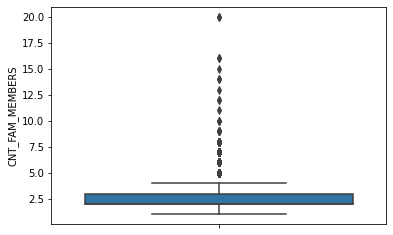

In [53]:
sns.boxplot(y='CNT_FAM_MEMBERS',data=data_v2)
plt.show()

In [54]:
# Few outliers.

In [55]:
data_v2['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [56]:
data_v2 = data_v2[data_v2['CNT_FAM_MEMBERS'] <= 8]

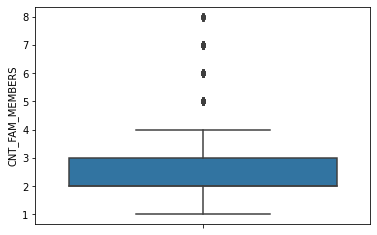

In [57]:
sns.boxplot(y='CNT_FAM_MEMBERS',data=data_v2)
plt.show()

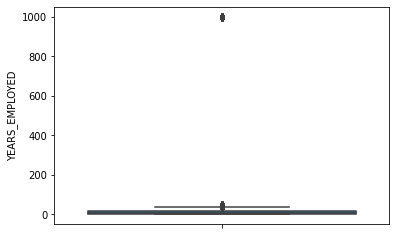

In [58]:
sns.boxplot(y= 'YEARS_EMPLOYED', data= data_v2) 
plt.show()

In [59]:
data_v2[data_v2.YEARS_EMPLOYED == 1000].NAME_INCOME_TYPE.value_counts()

Pensioner     55351
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

In [60]:
data_v2.loc[data_v2.YEARS_EMPLOYED == 1000, 'YEARS_EMPLOYED']= np.NAN

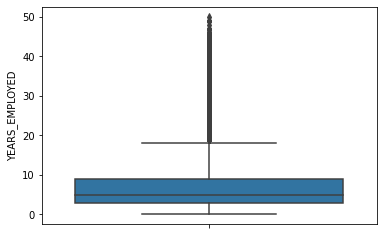

In [61]:
sns.boxplot(y= 'YEARS_EMPLOYED', data= data_v2) 
plt.show()

# Bivariate

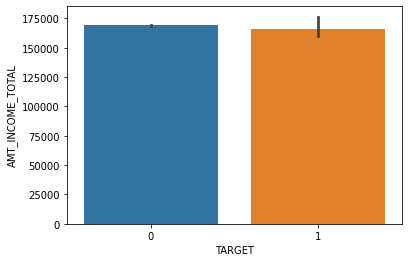

In [62]:
sns.barplot(x='TARGET', y='AMT_INCOME_TOTAL', data= data_v2)
plt.show()

<AxesSubplot: xlabel='TARGET', ylabel='AMT_INCOME_TOTAL'>

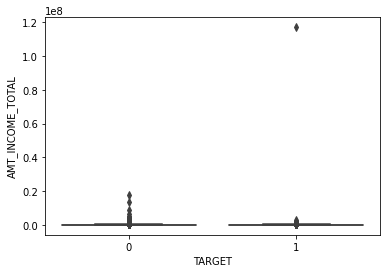

In [63]:
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data= data_v2)

In [64]:
data_v2['AMT_INCOME_TOTAL'].max()

117000000.0

In [65]:
data_v2 = data_v2[data_v2['AMT_INCOME_TOTAL'] < 999999]

In [66]:
data_v2.shape

(307239, 21)

<AxesSubplot: xlabel='TARGET', ylabel='AMT_INCOME_TOTAL'>

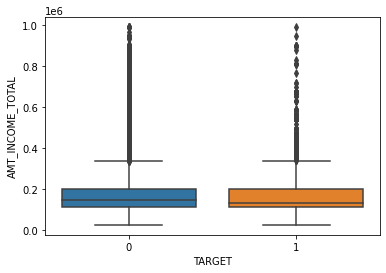

In [67]:
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data= data_v2)

In [68]:
# no success / no relationship found

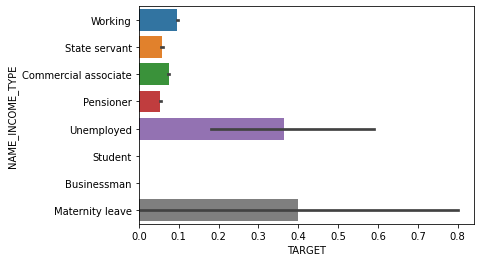

In [69]:
sns.barplot(x= 'TARGET', y= 'NAME_INCOME_TYPE', data=data_v2)
plt.show()

In [70]:
# Insight: Unemployed and Maternity Leave persons are defaulters.

In [71]:
pd.crosstab(data_v2['TARGET'], data_v2['NAME_EDUCATION_TYPE'])

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
TARGET,,,,,
0,161,70679,9401,3396,198793
1,3,4003,871,417,19515


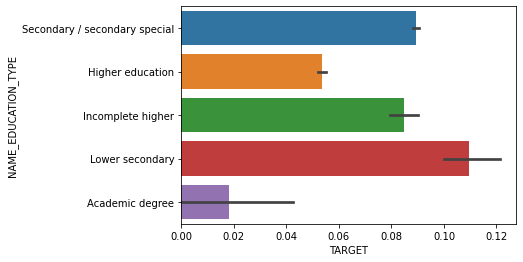

In [72]:
sns.barplot(x= 'TARGET', y= 'NAME_EDUCATION_TYPE', data=data_v2)
plt.show()

In [73]:
# Insight: Lower the education level, higher the chances of becoming defaulter

In [74]:
pd.crosstab(data_v2['TARGET'], data_v2['NAME_FAMILY_STATUS'])

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Widow
TARGET,,,,,
0,26799,181400,18133,40953,15145
1,2957,14839,1620,4456,937


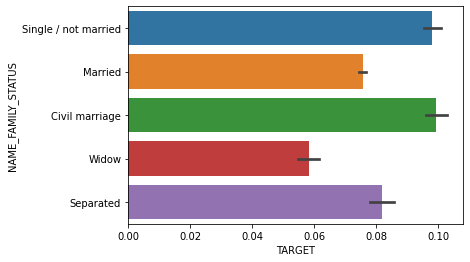

In [75]:
sns.barplot(x= 'TARGET', y= 'NAME_FAMILY_STATUS', data=data_v2)
plt.show()

In [76]:
# Insight: if the marital status is single, 
# there are highest chances of him/her to be defaulter 

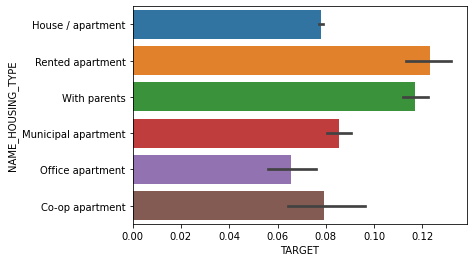

In [77]:
sns.barplot(x= 'TARGET', y= 'NAME_HOUSING_TYPE', data=data_v2)
plt.show()

In [78]:
# Insight: Rented apppartments and With Parents category have highest probability of being defaulters

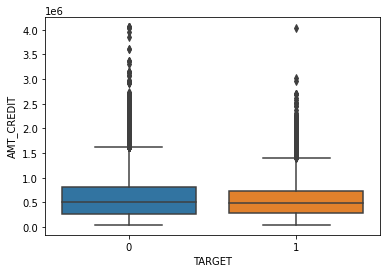

In [79]:
sns.boxplot(x= 'TARGET', y= 'AMT_CREDIT', data=data_v2)
plt.show()

In [80]:
# Insight: There are outliers but we can say that higher the amount credited, 
# there is no intuition that default probability is higher.

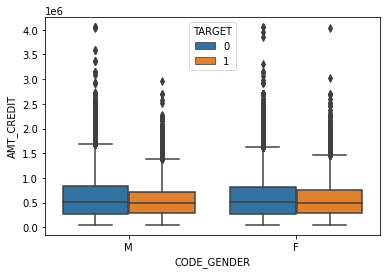

In [81]:
sns.boxplot(x='CODE_GENDER', y='AMT_CREDIT', data= data_v2, hue= 'TARGET')
plt.show()

In [82]:
# Insight:
# Males have more chances of higher credit
# Both genders have similar probabilites of defaulting 

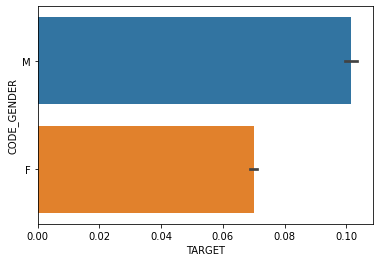

In [83]:
sns.barplot(x='TARGET', y='CODE_GENDER', data=data_v2)
plt.show()

In [84]:
# Gender plays a vital role
# Males are more likely to default.

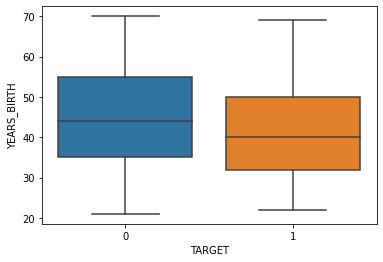

In [85]:
sns.boxplot(x='TARGET', y='YEARS_BIRTH', data=data_v2)
plt.show()

In [86]:
# Insight: Nothing much from age
# 30-40 is the age where maximum chances of being defaulter
# 20-30 is the age where minimum chances of being defaulter

In [87]:
pd.crosstab(data_v2['FLAG_OWN_REALTY'],data_v2['TARGET'])

TARGET,0,1
FLAG_OWN_REALTY,,
N,86260,7836
Y,196170,16973


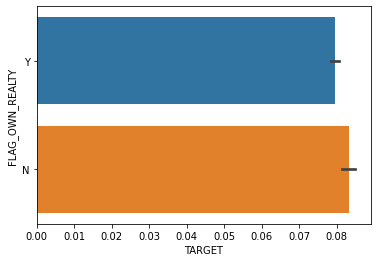

In [88]:
sns.barplot(x= 'TARGET', y= 'FLAG_OWN_REALTY', data=data_v2)
plt.show()

In [89]:
# Insight: This is strange, owning a property has nothing to do with defaulting
# ideally if a person owns a property, then chances of defaulting should be significantly less.

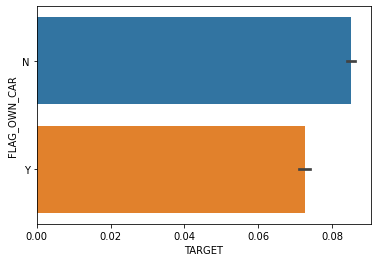

In [90]:
sns.barplot(x= 'TARGET', y= 'FLAG_OWN_CAR', data=data_v2)
plt.show()

In [91]:
# Insight: those who don't own a car are more likely to default.

In [92]:
pd.crosstab(data_v2['TARGET'],data_v2['OCCUPATION_TYPE'],normalize='columns')

OCCUPATION_TYPE,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
TARGET,,,,,,,,,,,,,,,,,,
0,0.951623,0.90385,0.89556,0.936985,0.88681,0.936057,0.938456,0.935238,0.89421,0.828476,0.937753,0.932982,0.93434,0.921438,0.903671,0.929339,0.892544,0.887157
1,0.048377,0.09615,0.10444,0.063015,0.11319,0.063943,0.061544,0.064762,0.10579,0.171524,0.062247,0.067018,0.06566,0.078562,0.096329,0.070661,0.107456,0.112843


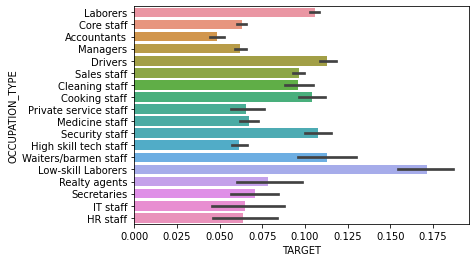

In [93]:
sns.barplot(x= 'TARGET', y= 'OCCUPATION_TYPE', data=data_v2)
plt.show()

In [94]:
# Insight: Low skill laborers, Security Staff, Waiters/Barmen staff, Drivers, Cooking Staff are highest defaulters

In [95]:
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

data_v2['AMT_INCOME_RANGE']=pd.cut(data_v2['AMT_INCOME_TOTAL'],bins,labels=slot)

In [96]:
bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

data_v2['AMT_CREDIT_RANGE']=pd.cut(data_v2['AMT_CREDIT'],bins=bins,labels=slots)

In [97]:
target0_df=data_v2.loc[data_v2["TARGET"]==0]
target1_df=data_v2.loc[data_v2["TARGET"]==1]

In [98]:
def uniplot(df,col,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='cool') 
        
    plt.show()

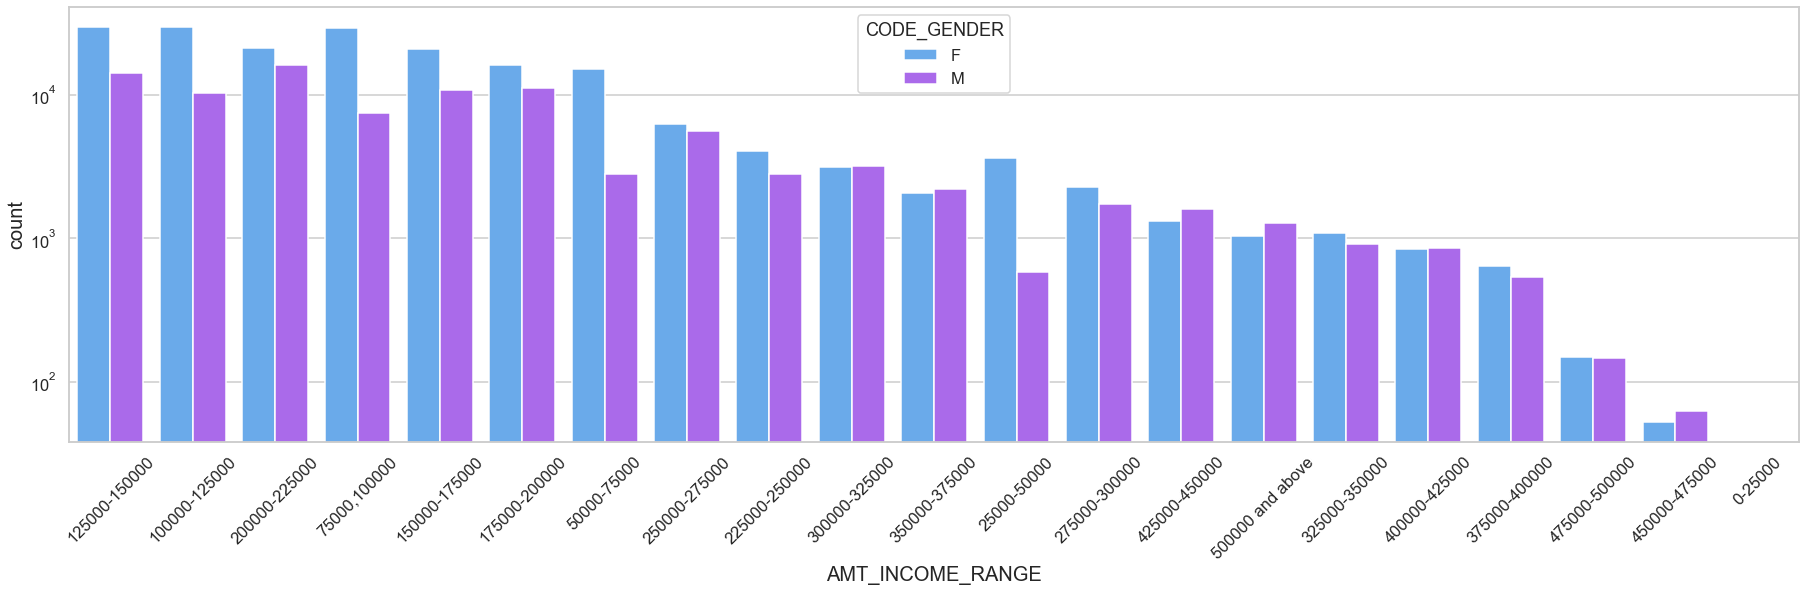

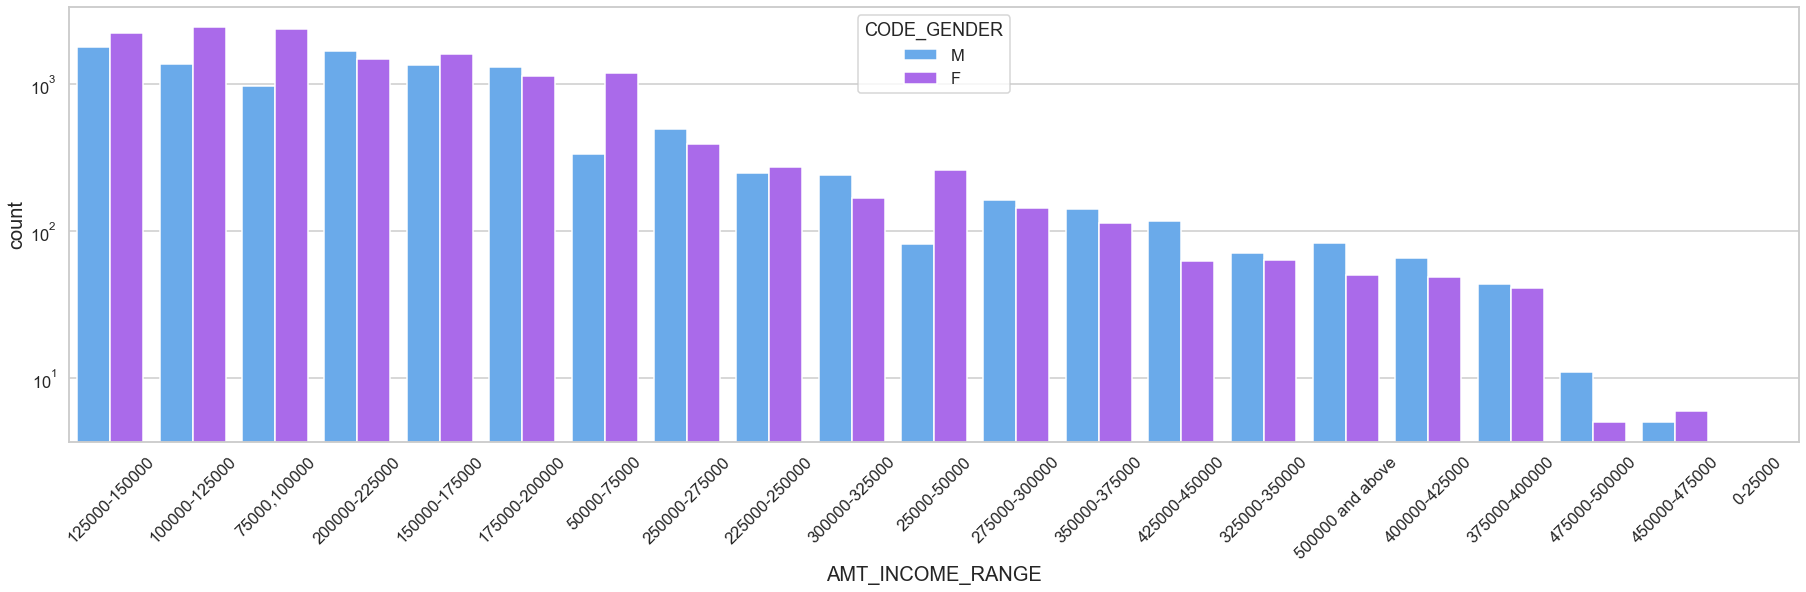

In [99]:
# Non Defaulters
uniplot(target0_df,col='AMT_INCOME_RANGE',hue='CODE_GENDER')

# Defaulters
uniplot(target1_df,col='AMT_INCOME_RANGE',hue='CODE_GENDER')

In [100]:
# Insight: Female counts are higher than male. 
# Income range from 100000 to 200000 is having more number of credits.
# This graph show that females are more than male in having credits for that range. 
# Very less count for income range 400000 and above.

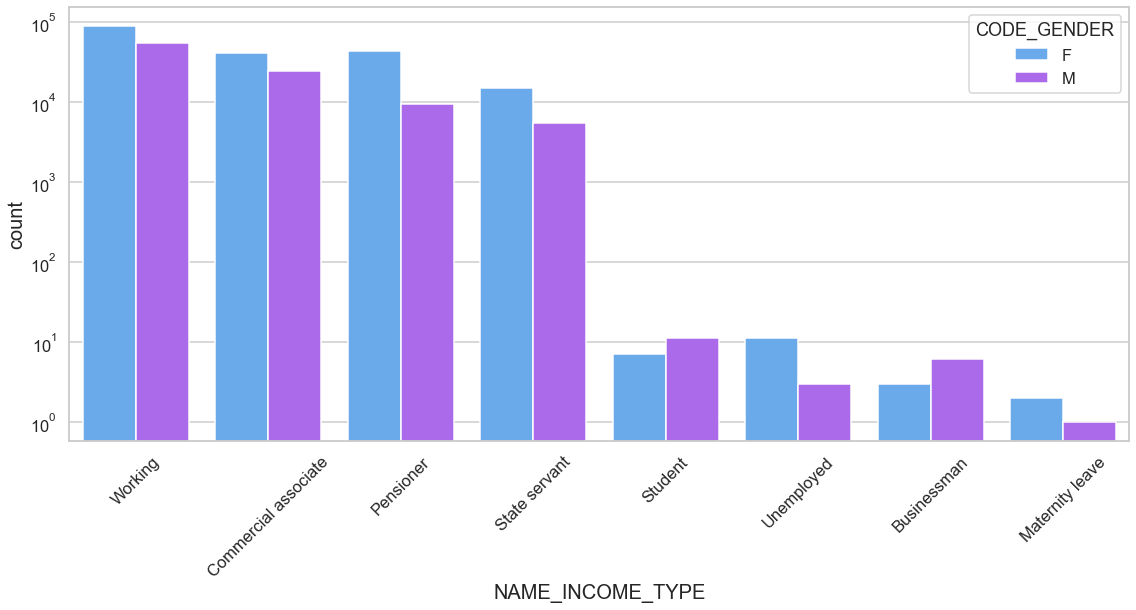

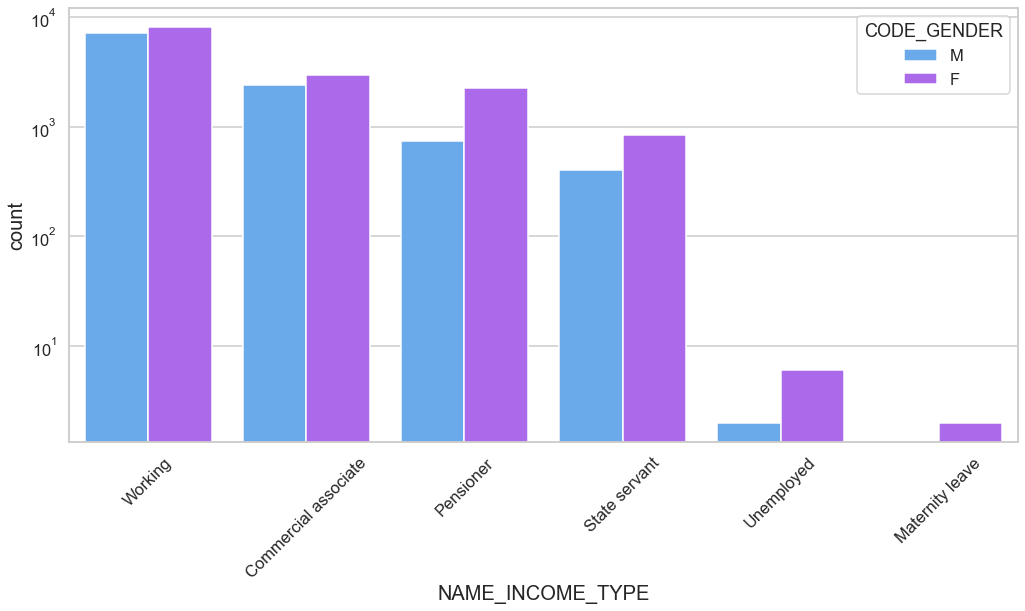

In [101]:
# Non Defaulters
uniplot(target0_df,col='NAME_INCOME_TYPE',hue='CODE_GENDER')
# Defaulters
uniplot(target1_df,col='NAME_INCOME_TYPE',hue='CODE_GENDER')

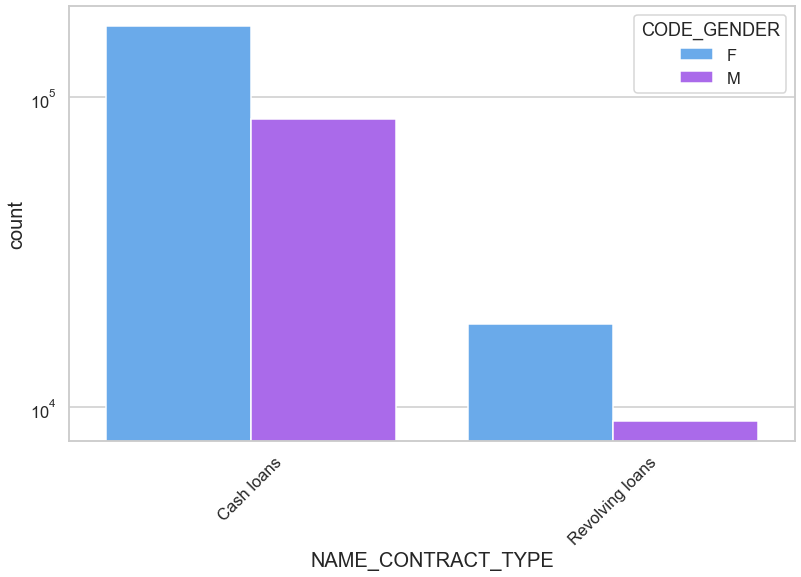

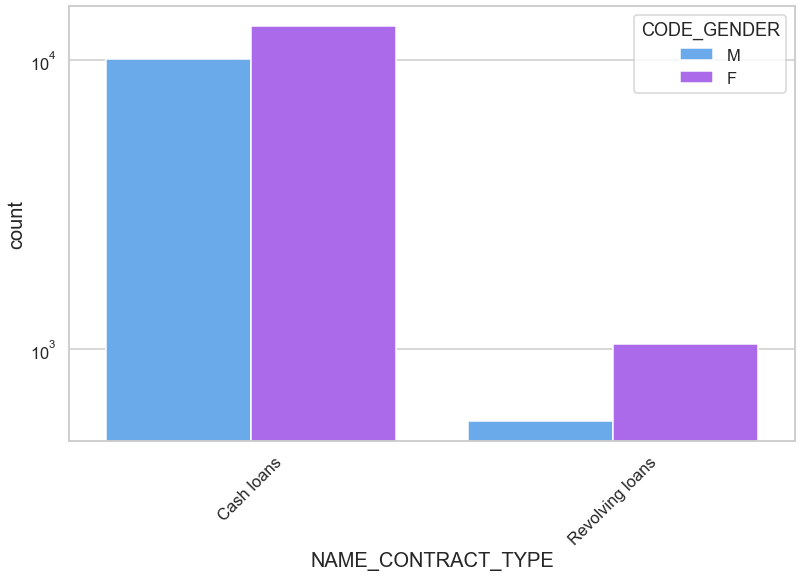

In [102]:
# Non Defaulters
uniplot(target0_df,col='NAME_CONTRACT_TYPE',hue='CODE_GENDER')
# Defaulters
uniplot(target1_df,col='NAME_CONTRACT_TYPE',hue='CODE_GENDER')

In [103]:
# Insight: ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type. 
# For this also Female is leading for applying credits.

In [104]:
data_v2.CNT_CHILDREN.describe()

count    307239.000000
mean          0.416318
std           0.716815
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           7.000000
Name: CNT_CHILDREN, dtype: float64

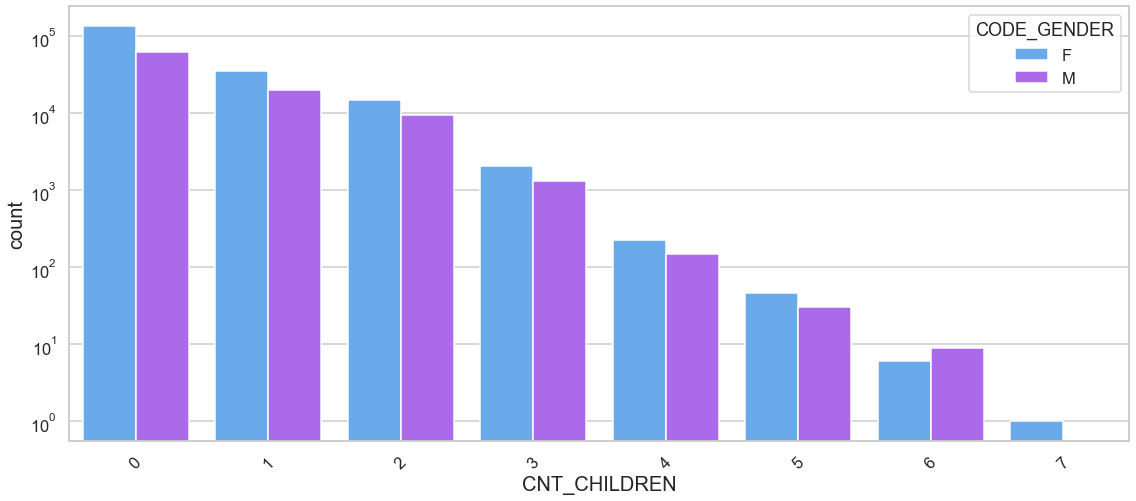

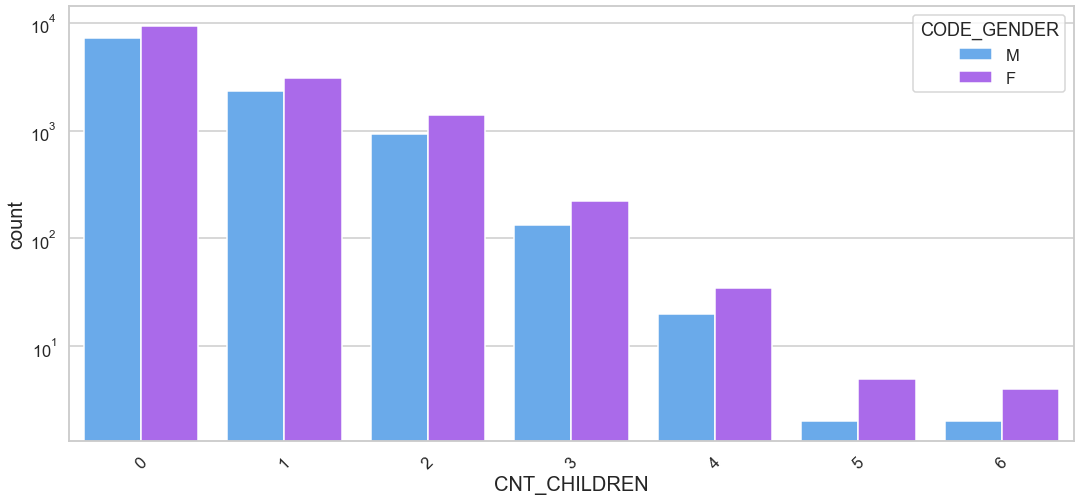

In [105]:
# Non Defaulters
uniplot(target0_df,col='CNT_CHILDREN',hue='CODE_GENDER')
# Defaulters
uniplot(target1_df,col='CNT_CHILDREN',hue='CODE_GENDER')

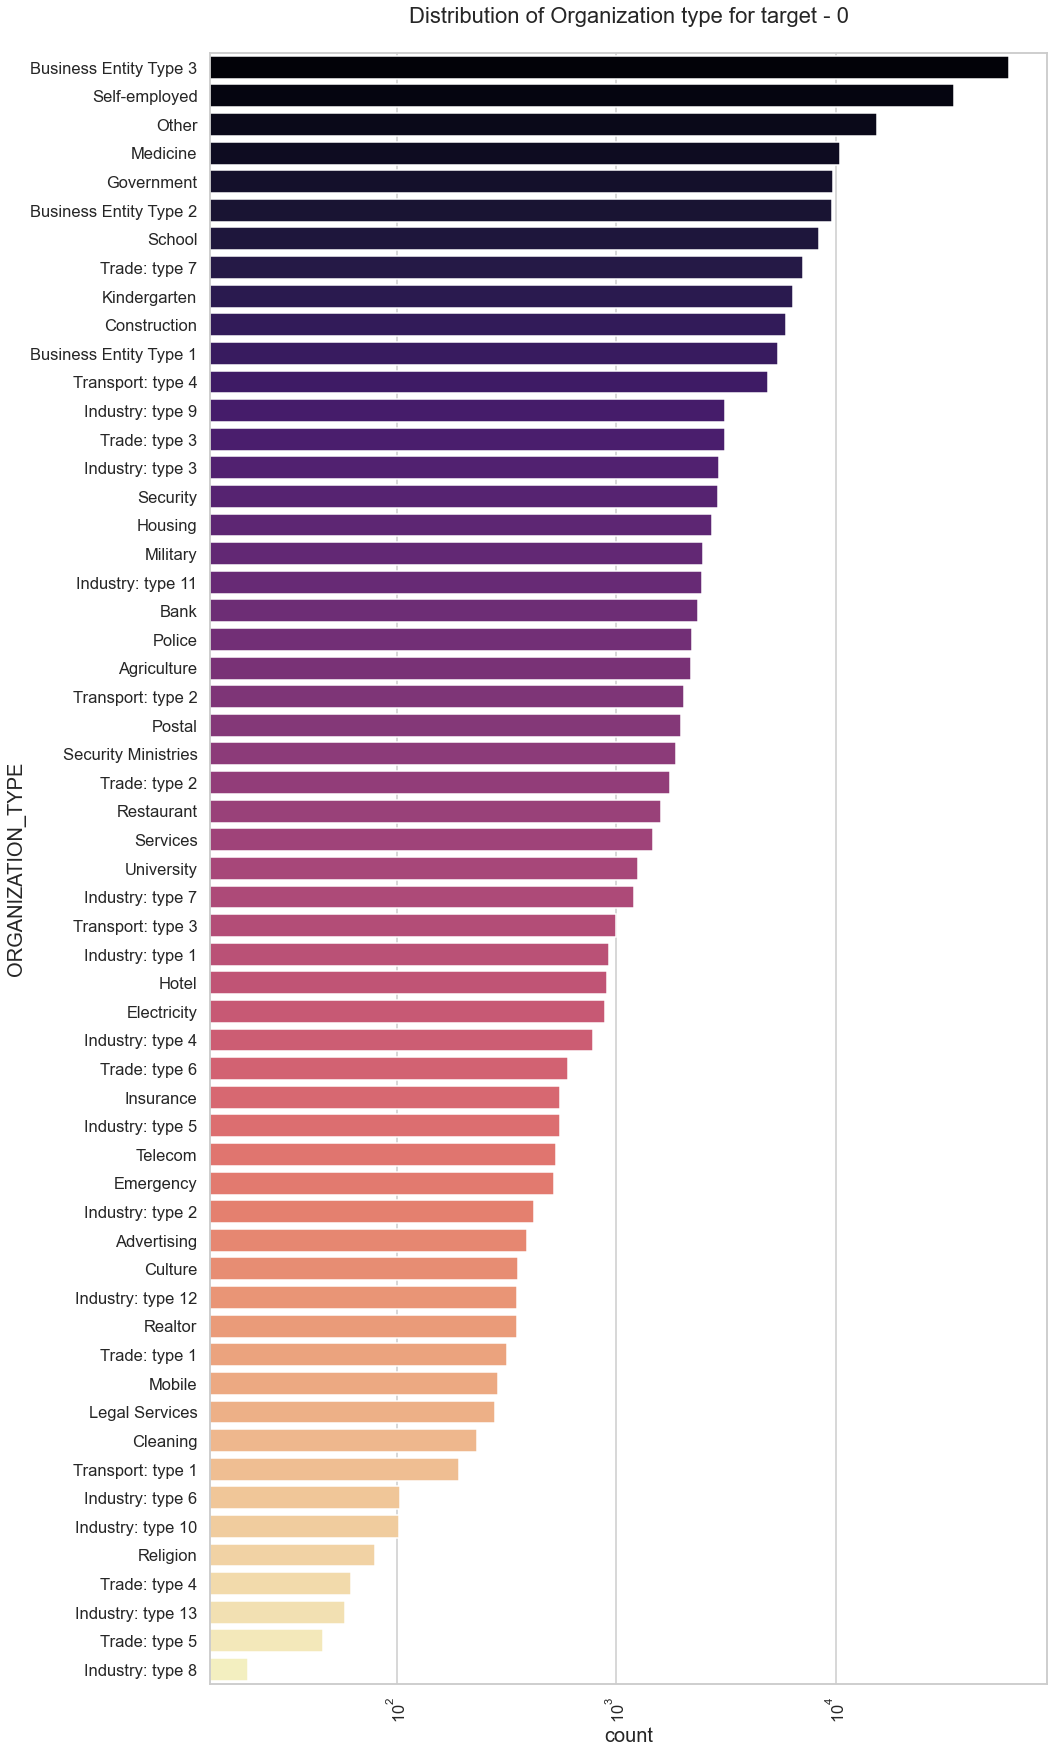

In [106]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_df,y='ORGANIZATION_TYPE',order=target0_df['ORGANIZATION_TYPE'].value_counts().index,palette='magma')

plt.show()

In [107]:
# Insight: Clients which have applied for credits are from 
# most of the organization type ‘Business entity Type 3’ , 
# ‘Self employed’, ‘Other’ , ‘Medicine’ and ‘Government’. 
# Less clients are from Industry type 8,type 6, type 10, 
# religion and trade type 5, type 4.

# Multivariate

In [108]:
numberic_cols= data_v2.select_dtypes(exclude=['object']).columns


<AxesSubplot: >

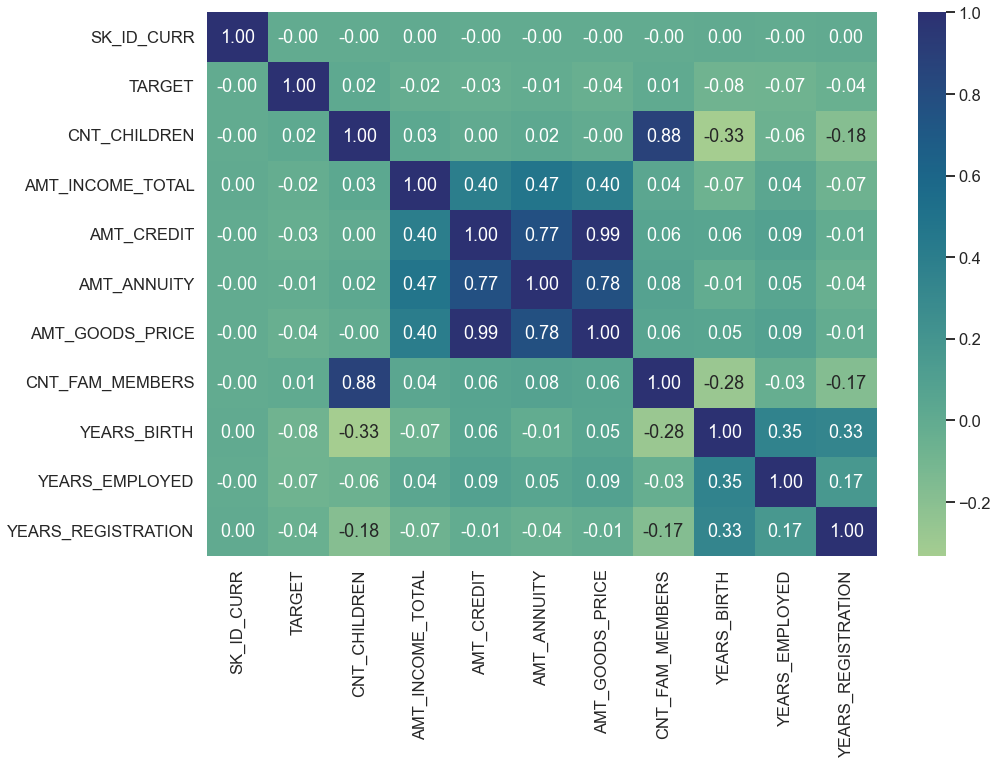

In [109]:
plt.subplots(figsize=(15,10))  
sns.heatmap(data_v2[numberic_cols].corr(),annot=True, fmt = ".2f", cmap = "crest")

In [110]:
# AMT_CREDIT and AMT_GOODS_PRICE have very high correlation.

In [111]:
def top_10_corr(df):
    corr1 = data_v2.select_dtypes(exclude=['object']).corr()
    corr_df1 = corr1.where(np.triu(np.ones(corr1.shape), k=1).astype(np.bool))
    corr_df1 = corr_df1.unstack().reset_index().dropna(subset = [0])
    corr_df1.columns = ['VAR1', 'VAR2', 'Correlation_Value']
    corr_df1['Corr_abs'] = abs(corr_df1['Correlation_Value'])
    corr_df1.sort_values(by = "Corr_abs", ascending =False, inplace = True)
    return corr_df1.head(10)

In [112]:
top_10_corr(data_v2)

,VAR1,VAR2,Correlation_Value,Corr_abs
70,AMT_GOODS_PRICE,AMT_CREDIT,0.986945,0.986945
79,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878022,0.878022
71,AMT_GOODS_PRICE,AMT_ANNUITY,0.775562,0.775562
59,AMT_ANNUITY,AMT_CREDIT,0.770861,0.770861
58,AMT_ANNUITY,AMT_INCOME_TOTAL,0.473435,0.473435
69,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.403872,0.403872
47,AMT_CREDIT,AMT_INCOME_TOTAL,0.397650,0.397650
107,YEARS_EMPLOYED,YEARS_BIRTH,0.351608,0.351608
90,YEARS_BIRTH,CNT_CHILDREN,-0.333090,0.333090
118,YEARS_REGISTRATION,YEARS_BIRTH,0.331782,0.331782


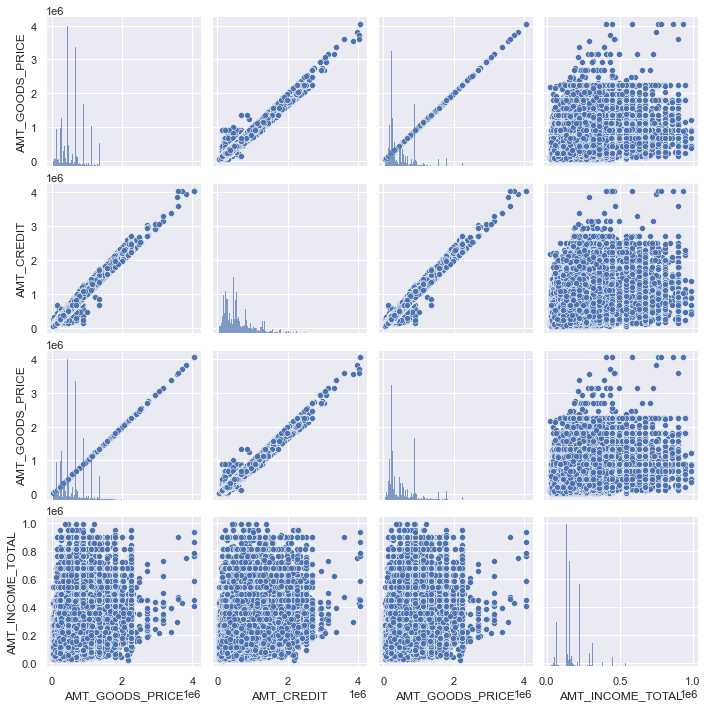

In [113]:
sns.set(rc={'figure.figsize':(10, 8)})
sns.pairplot(data_v2, vars = ['AMT_GOODS_PRICE','AMT_CREDIT','AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL'])
plt.show()

In [114]:
# Insight: The features Income, credit amount and good price have high correlation with each other.
#  The larger the applicant's income, the larger the credit amount, similar to the value of the good price

# Merging two datasets

In [115]:
previous_data = pd.read_csv("./data/previous_application.csv")

In [116]:
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
previous_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [118]:
previous_data.shape

(1670214, 37)

In [119]:
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [120]:
previous_data.dtypes.value_counts()

object     16
float64    15
int64       6
dtype: int64

In [121]:
previous_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [122]:
previous_data.describe(include='object')

,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
count,1670214,1670214,1670214,1670214,1670214,1670214,1670214,849809,1670214,1670214,1670214,1670214,1670214,1670214,1670214,1669868
unique,4,7,2,25,4,4,9,7,4,28,5,3,8,11,5,17
top,Cash loans,TUESDAY,Y,XAP,Approved,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,POS,XNA,Credit and cash offices,XNA,XNA,Cash
freq,747553,255118,1661739,922661,1036781,1033552,1353093,508970,1231261,950809,691011,1063666,719968,855720,517215,285990


In [123]:
n_rows = previous_data.shape[0]
null_df = (previous_data.isnull().sum()/n_rows*100).sort_values(ascending= False)

In [124]:
null_df.head(40)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [125]:
previous_data_v2 = previous_data.dropna(axis=1, thresh=n_rows*0.8)

In [126]:
len(previous_data_v2.columns)

23

In [127]:
n_rows = previous_data_v2.shape[0]
null_df = (previous_data_v2.isnull().sum()/n_rows*100).sort_values(ascending= False)

In [128]:
null_df.head()

PRODUCT_COMBINATION     0.020716
AMT_CREDIT              0.000060
NAME_PAYMENT_TYPE       0.000000
NAME_YIELD_GROUP        0.000000
NAME_SELLER_INDUSTRY    0.000000
dtype: float64

In [129]:
# Merge the Application dataset with previous appliaction dataset
combine_data =pd.merge(left=data_v2,right=previous_data_v2,how='inner',on='SK_ID_CURR',suffixes=('_x', '_y'))

In [130]:
combine_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE', 'OCCUPATION_TYPE',
       'YEARS_BIRTH', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION',
       'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE', 'SK_ID_PREV',
       'NAME_CONTRACT_TYPE_y', 'AMT_APPLICATION', 'AMT_CREDIT_y',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COM

In [131]:
# combine_data.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START'])

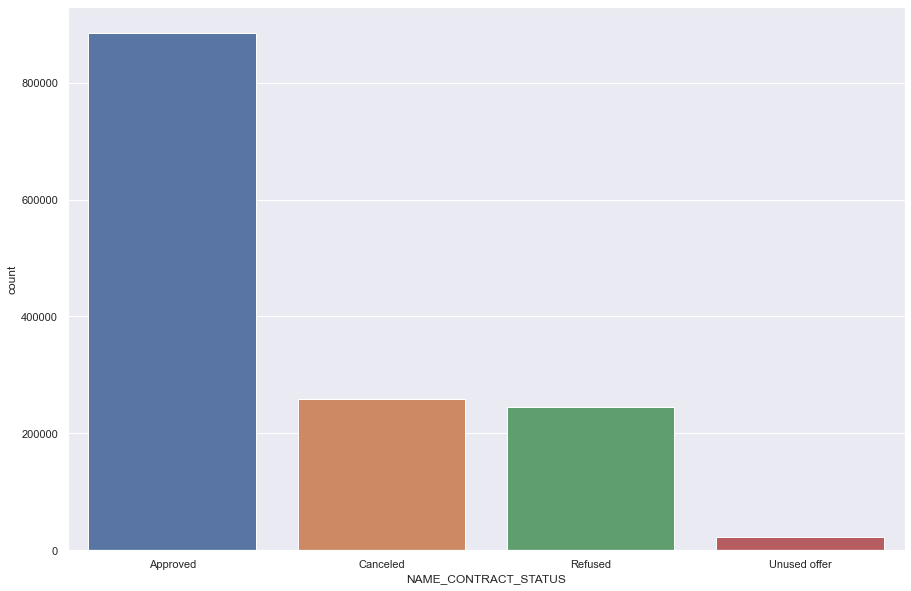

In [132]:
plt.subplots(figsize=(15,10)) 
sns.countplot(x = combine_data['NAME_CONTRACT_STATUS'])
plt.show()

In [133]:
def plot_var_2(col_name, full_name, continuous):
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(20,8))
    if continuous:  
        sns.distplot( combine_data[col_name],bins = 40, kde=False, ax=ax1)
    else:
        sns.countplot(x = combine_data[col_name], order=sorted(combine_data[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xticklabels(sorted(combine_data[col_name].unique()), rotation = 90)   

          
    if continuous:
        sns.boxplot(y='NAME_CONTRACT_STATUS', x= col_name, data=combine_data, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Contract status')
    else:
        contrac_status_rates = combine_data.groupby(col_name,as_index = False)['NAME_CONTRACT_STATUS'].value_counts(normalize=True)
        sns.barplot(x=contrac_status_rates[col_name], y=contrac_status_rates['proportion'], hue=contrac_status_rates['NAME_CONTRACT_STATUS'],  saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of applicant have  ')
        ax2.set_title('Contract proportion by ' + full_name)
        ax2.set_xlabel(full_name)
        plt.xticks(rotation=90)   

    if continuous:  
        facet = sns.FacetGrid(combine_data, hue = 'NAME_CONTRACT_STATUS', height=3, aspect=4)
        facet.map(sns.kdeplot, col_name, shade=True)
        facet.add_legend()  

    plt.tight_layout()

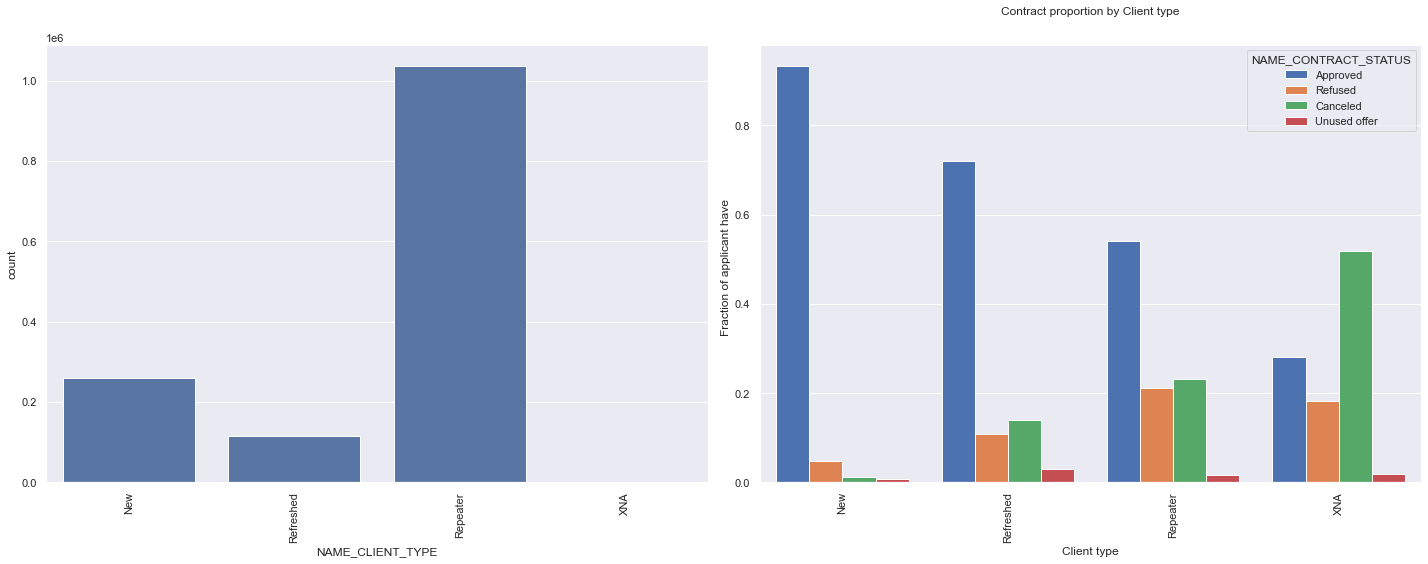

In [134]:
plot_var_2('NAME_CLIENT_TYPE','Client type',continuous= False)

In [135]:
# Insight: Repeater is the type of customer with the highest rejection and cancellation rate, about 20%

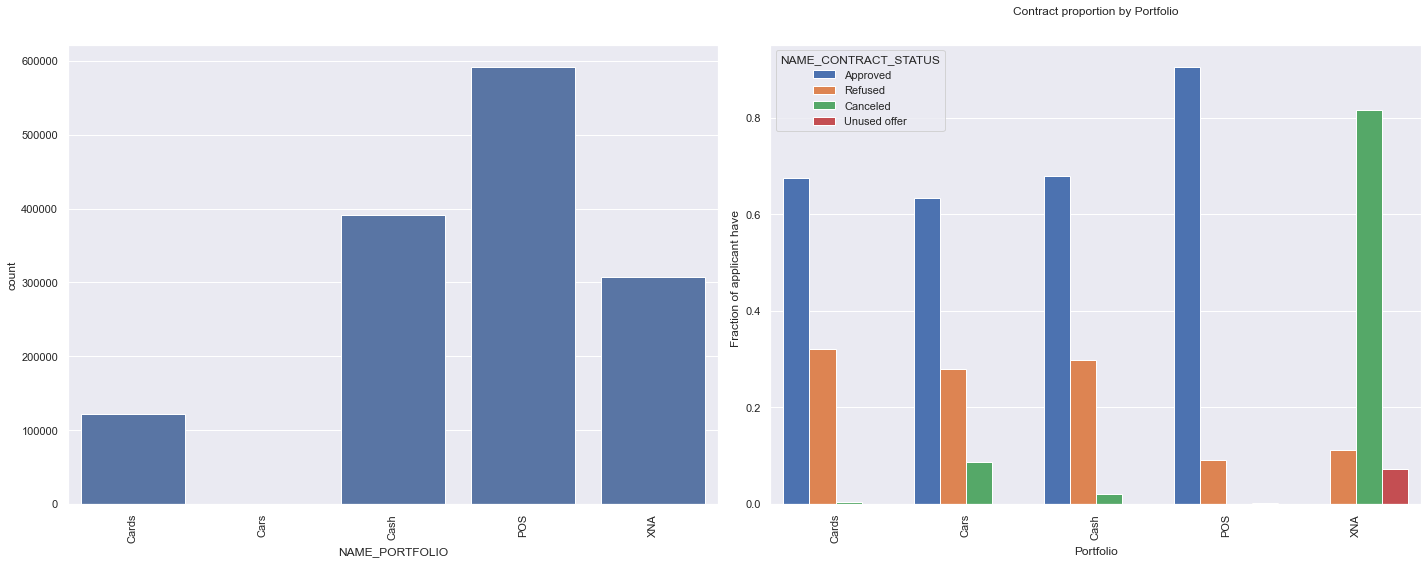

In [136]:
plot_var_2('NAME_PORTFOLIO','Portfolio',continuous= False)

In [137]:
# Insight: Applicant without Portfolio information will usually get loan canceled

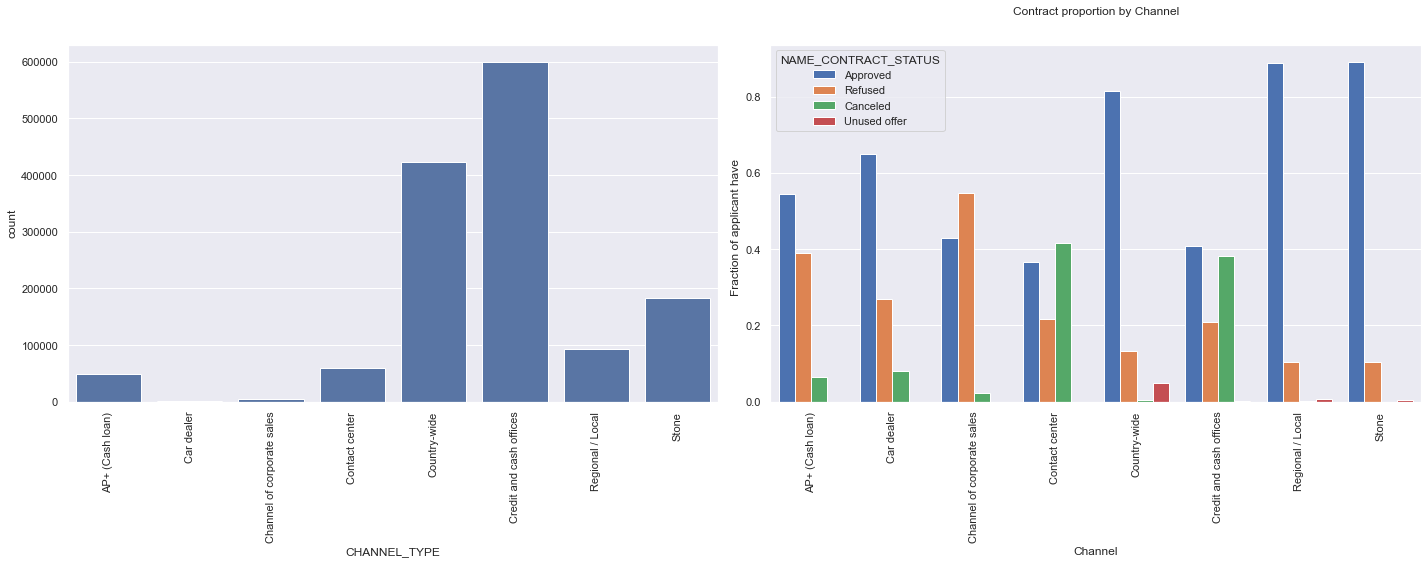

In [138]:
plot_var_2('CHANNEL_TYPE','Channel',continuous= False)

In [139]:
# Insight: Regional / Local and Stone channel has a higher loan approval rate than other channels

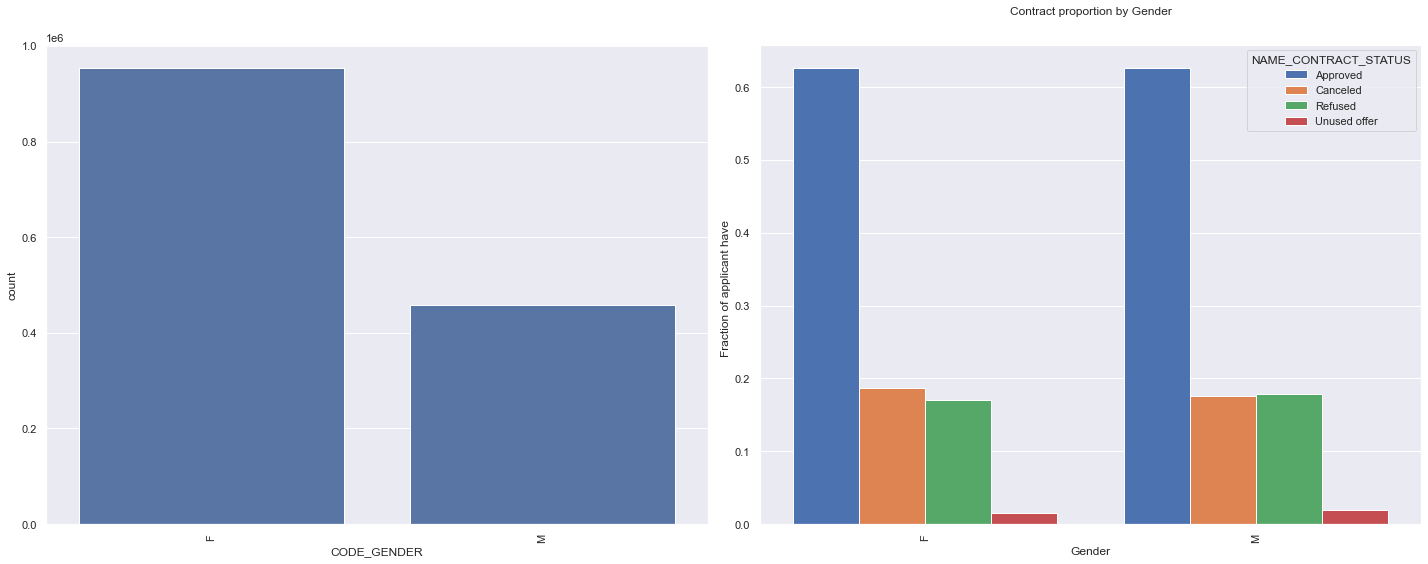

In [140]:
plot_var_2('CODE_GENDER','Gender',continuous= False)

In [141]:
# Insight: Here we can see that Female is getting more Refused more approved more canceled 
# more unused but in case of male it is having average in every category.

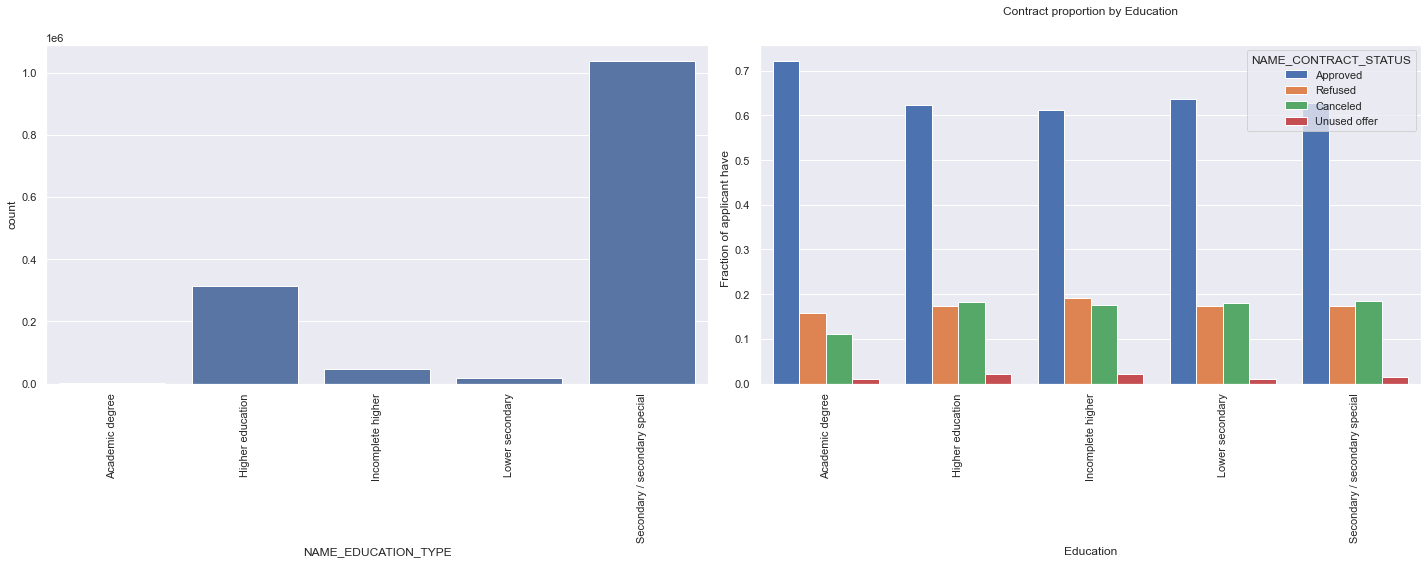

In [142]:
plot_var_2('NAME_EDUCATION_TYPE','Education',continuous= False)

In [143]:
# Insight: Here we can see that Secondary/ Secondary special is more effective in every case

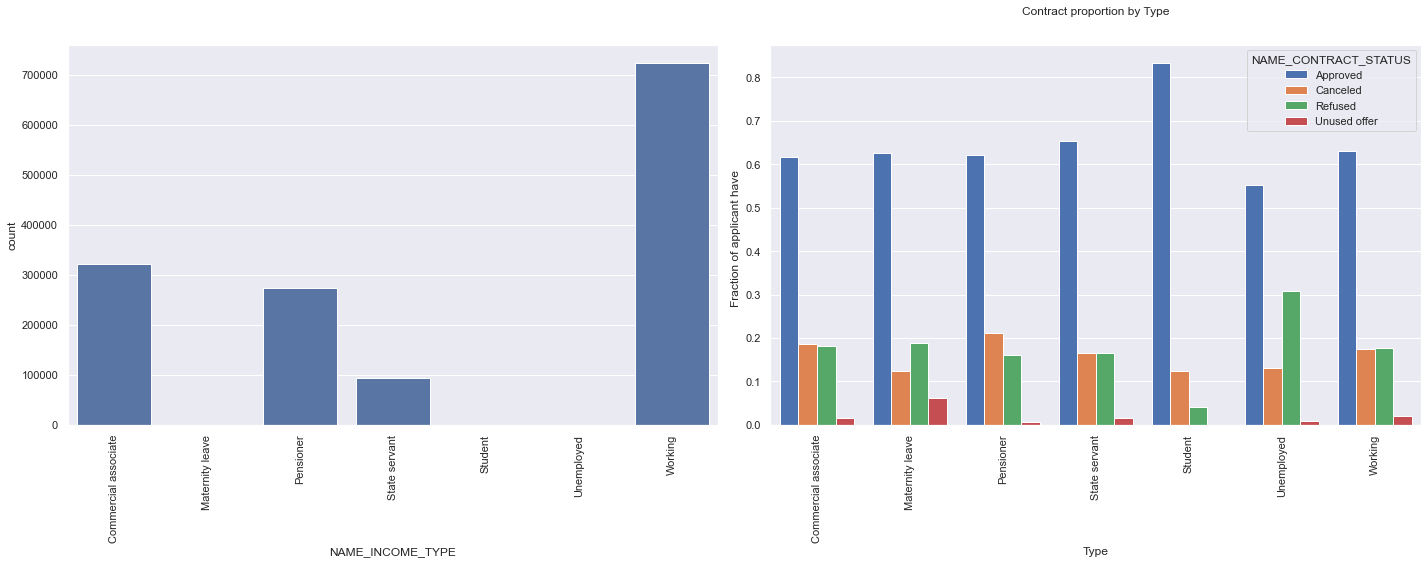

In [144]:
plot_var_2('NAME_INCOME_TYPE','Type',continuous= False)

In [145]:
# Insight: Here we can see that the working type people are applying more loans as compare to others 

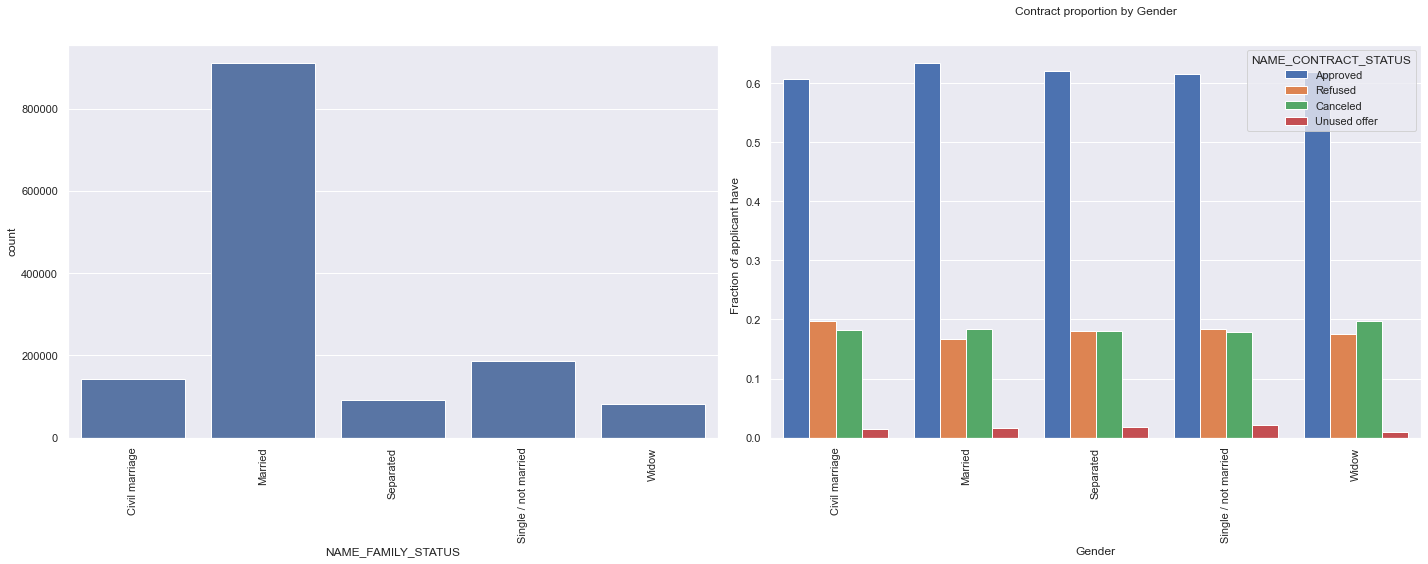

In [146]:
plot_var_2('NAME_FAMILY_STATUS','Gender',continuous= False)

In [147]:
# Here we can see that the Married people are applying and taking loans more than the others.¶

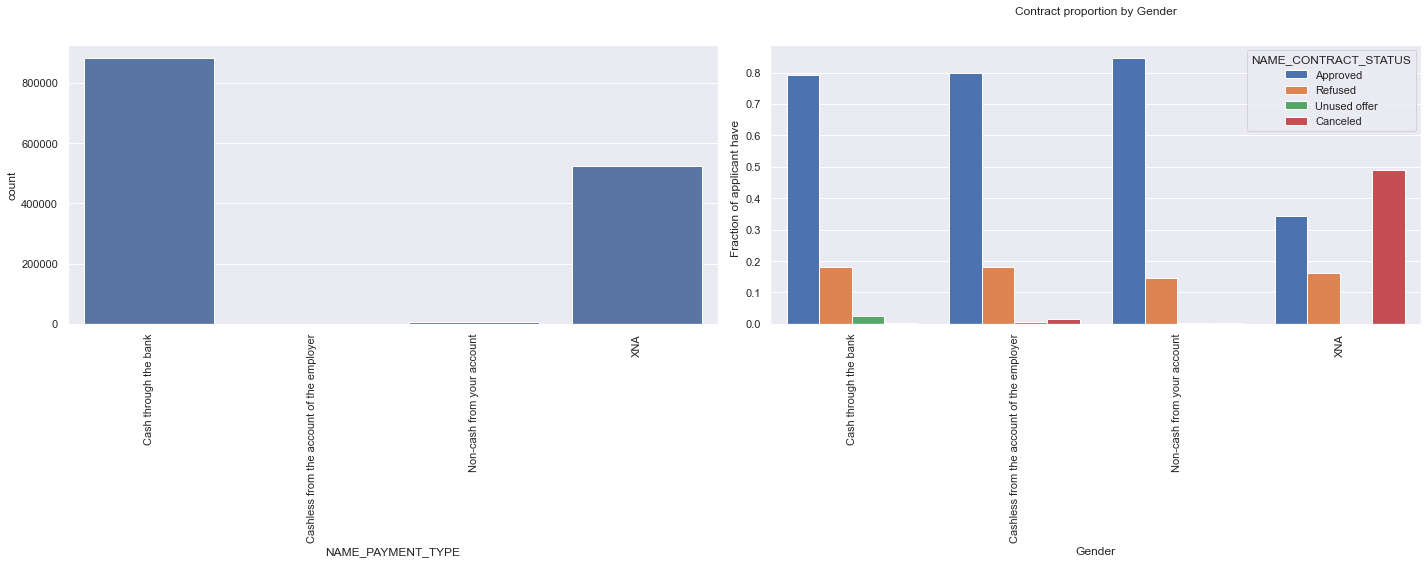

In [148]:
plot_var_2('NAME_PAYMENT_TYPE','Gender',continuous= False)

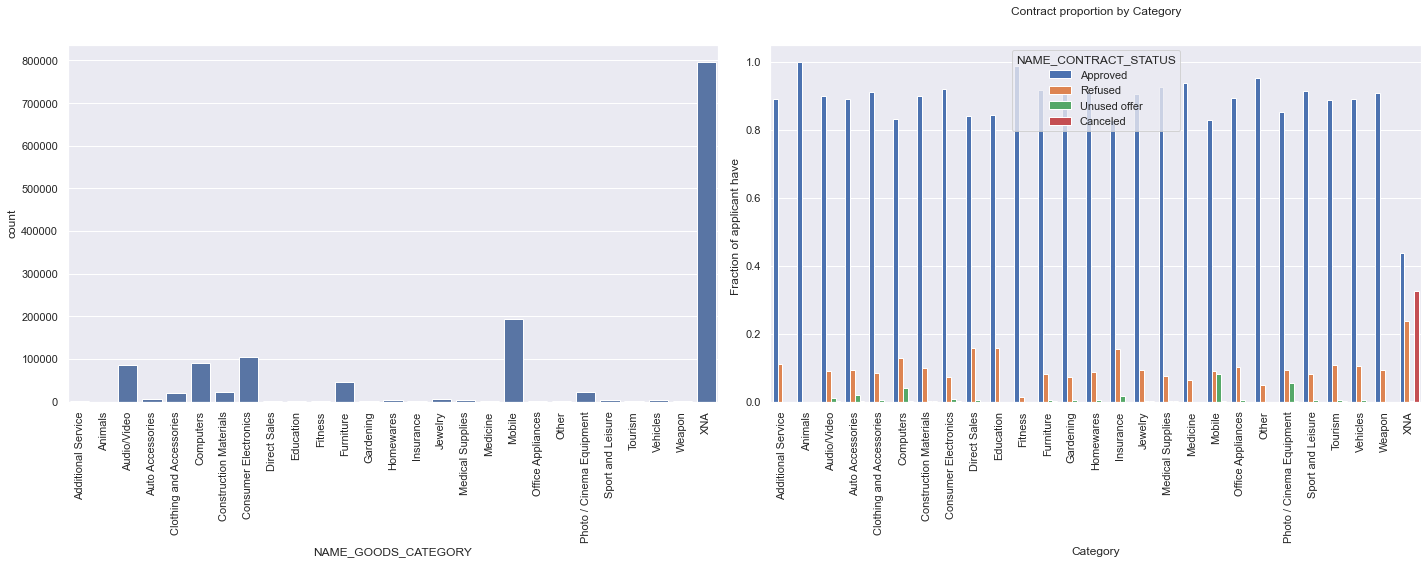

In [149]:
plot_var_2('NAME_GOODS_CATEGORY','Category',continuous= False)